# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name:  
Created by Akash Hebbar (015550873), Aaminah Mohammad (016466424), Steven Dinh (015208752), Justine Mae Legson ()  
Last updated: 9/23/25  
Briefly describe your dataset:  
The dataset contains healthcare statistics and lifestyle information from people along with their diagnosis of diabetes. The features range from demographics, lab test results, and answer from patient survey questions. The target variable for classification is whether a patient is diabetic, prediabetic, or healthy.

Dataset : https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

### Q1: Show the number of missing data in each column of the dataframe

In [ ]:
# Your code here . . .
import pandas as pd

url = "https://raw.githubusercontent.com/aaminahmq/Datafiles/refs/heads/main/CS133%20group%20project%20files/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(url)

#print(df.head())

In [ ]:

missing_data = df.isnull().sum()
print("Number of missing data in each column:")
print(missing_data)

Number of missing data in each column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


### Q2: Show the data type for each column of the dataframe

In [ ]:
# Your code here . . .
print(df.dtypes)

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

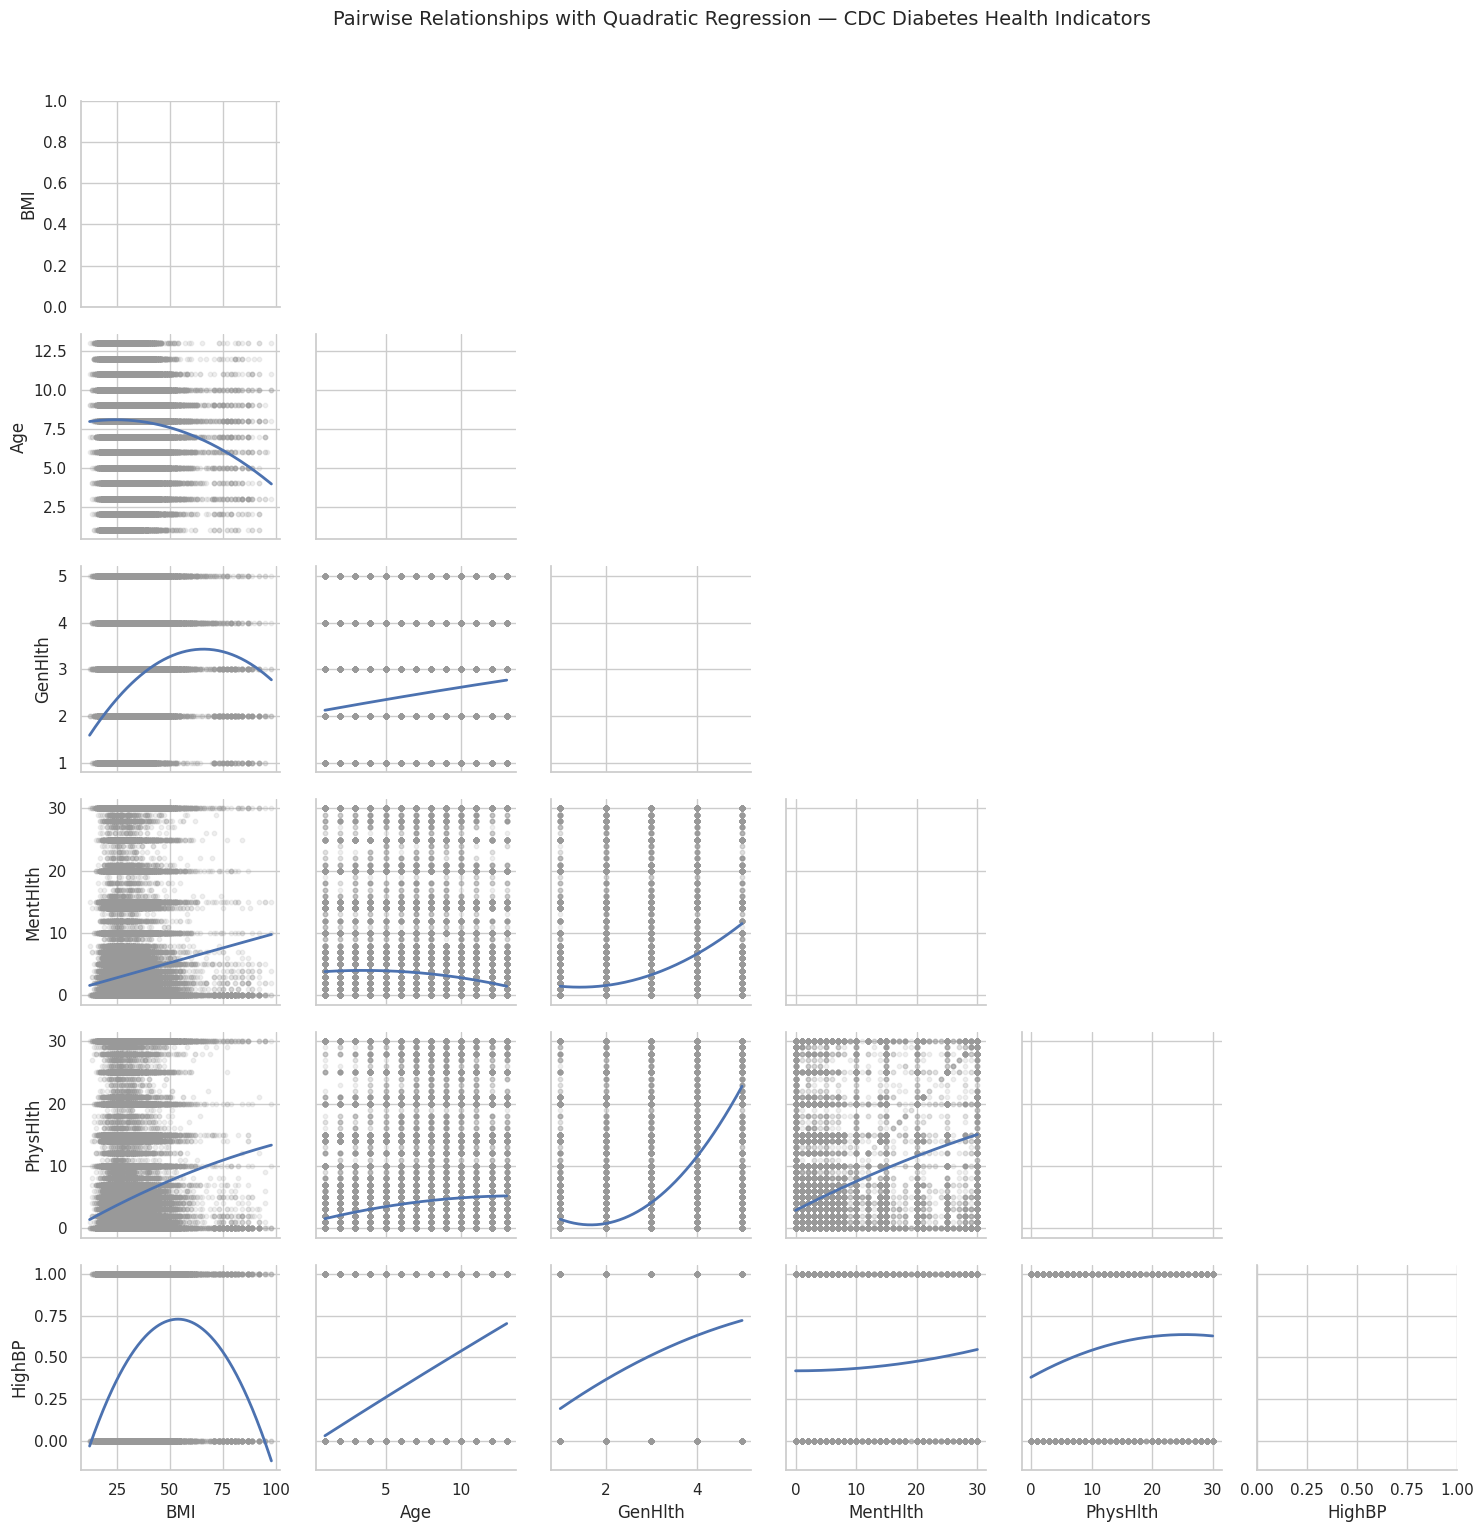

In [ ]:
# Your code here . . .
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cols = [
    "BMI",
    "Age",
    "GenHlth",
    "MentHlth",
    "PhysHlth",
    "HighBP"
]

data = df[cols].copy()

sns.set(style="whitegrid")


g = sns.PairGrid(data, corner=True, diag_sharey=False)


g.map_lower(plt.scatter, s=10, alpha=0.15, color="0.6")

def draw_poly_reg(x, y, degree=2, line_kwargs=None, **kws):
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < degree + 1:
        return
    coeffs = np.polyfit(x[m], y[m], degree)
    xs = np.linspace(x[m].min(), x[m].max(), 200)
    ys = np.polyval(coeffs, xs)
    if line_kwargs is None:
        line_kwargs = dict(linewidth=2)

    plt.plot(xs, ys, **line_kwargs)

g.map_lower(draw_poly_reg, degree=2, line_kwargs=dict(linewidth=2))




g.fig.suptitle(
    "Pairwise Relationships with Quadratic Regression — CDC Diabetes Health Indicators",
    y=1.02, fontsize=14
)
plt.tight_layout()
plt.show()

### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

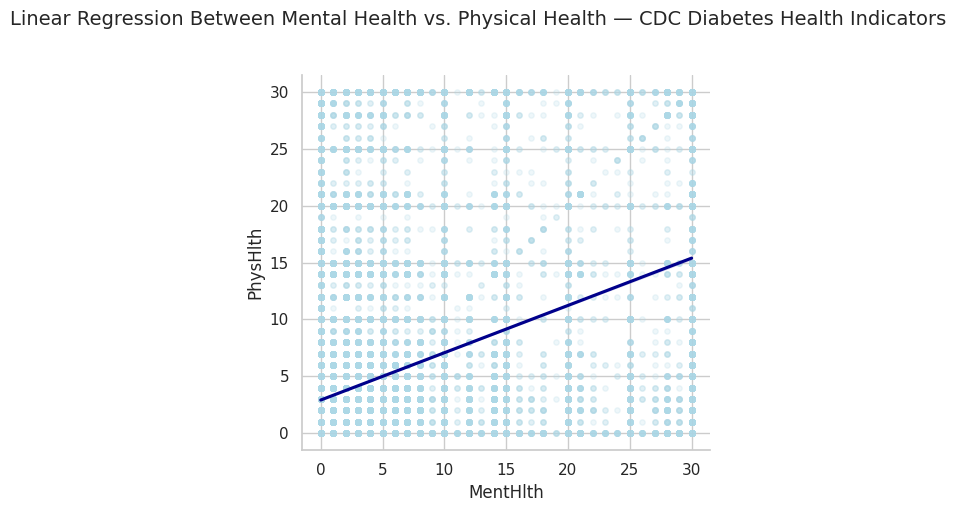

In [ ]:
# Your code here . . .

# subset the two features: mental health & physical health
subset = df[["MentHlth", "PhysHlth"]].copy()

# filter and keep values within 0–30 days (valid range)
subset = subset[(subset["MentHlth"] <= 30) & (subset["PhysHlth"] <= 30)]

sns.set(style="whitegrid")

# create regression plot
g = sns.lmplot(
    data=subset,
    x="MentHlth",
    y="PhysHlth",
    scatter_kws={"alpha":0.2, "s":15, "color":"lightblue"},  # make the points more transparent
    line_kws={"color":"darkblue"}                            # regression line
)

# create meaningful title
g.fig.suptitle(
    "Linear Regression Between Mental Health vs. Physical Health — CDC Diabetes Health Indicators",
    y=1.02, fontsize=14
)
plt.tight_layout()
plt.show()

### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

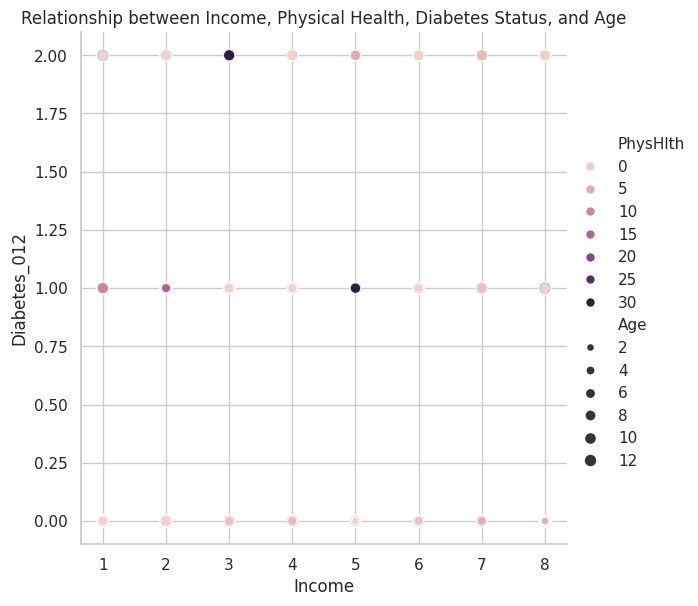

In [ ]:
# Your code here . . .
df = pd.read_csv(url)
sns.relplot(
    data = df,
    x = "Income",
    y = "Diabetes_012",
    hue = "PhysHlth",
    size = "Age",
    kind = "scatter",
    height = 6
)
plt.title("Relationship between Income, Physical Health, Diabetes Status, and Age")
plt.show()

### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

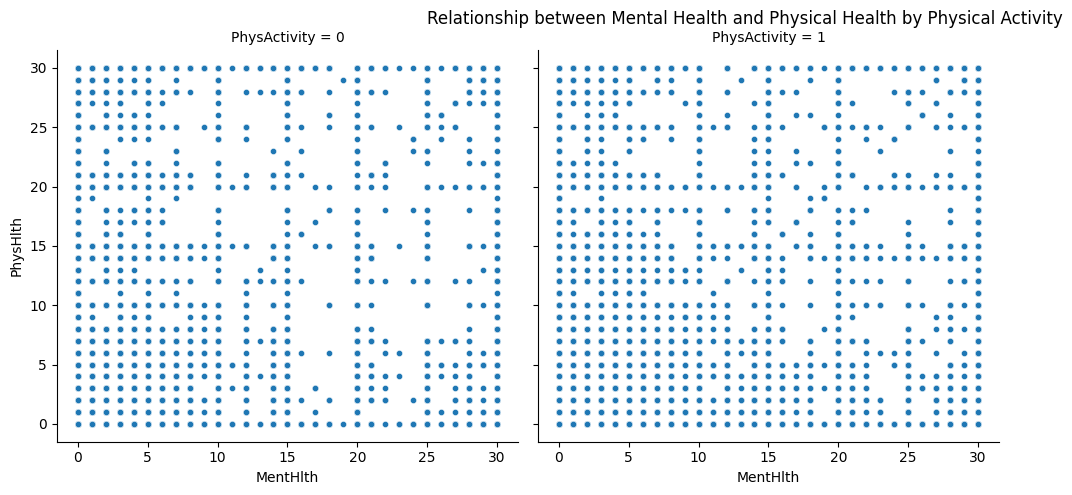

In [3]:
# Your code here . . .

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://docs.google.com/spreadsheets/d/14xvQTU3V4vFcKsk3BYBjWu7Imb4xna7d7nGdRPuvmZM/export?format=csv"
df = pd.read_csv(url)

df.head()

x_feat = "MentHlth"
y_feat = "PhysHlth"
category = "PhysActivity"

df[category] = df[category].astype(str)

g = sns.FacetGrid(df, col=category, col_wrap = 3, height = 5)  # plots per row 3, height of 5
g.map_dataframe(sns.scatterplot, x=x_feat, y=y_feat, s=20)  # size of data point 20

plt.subplots_adjust(top=0.9)
g.fig.suptitle(f"Relationship between Mental Health and Physical Health by Physical Activity") # meaningful title

g.set_axis_labels(x_feat, y_feat)

plt.show()